<a href="https://colab.research.google.com/github/mteoraso/mteoraso/blob/Machine-Learning-Projects/practica_modelos_ml_solubilidad_moleculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto solubilidad de moleculas**

La solubilidad es la capacidad de una sustancia, denominada soluto, de disolverse en otra llamada disolvente; es decir, es la cantidad máxima de un soluto que un solvente puede recibir en determinadas condiciones ambientales.

In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

In [ ]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **Analisis Exploratorio de Datos**

In [ ]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


<Figure size 640x480 with 0 Axes>

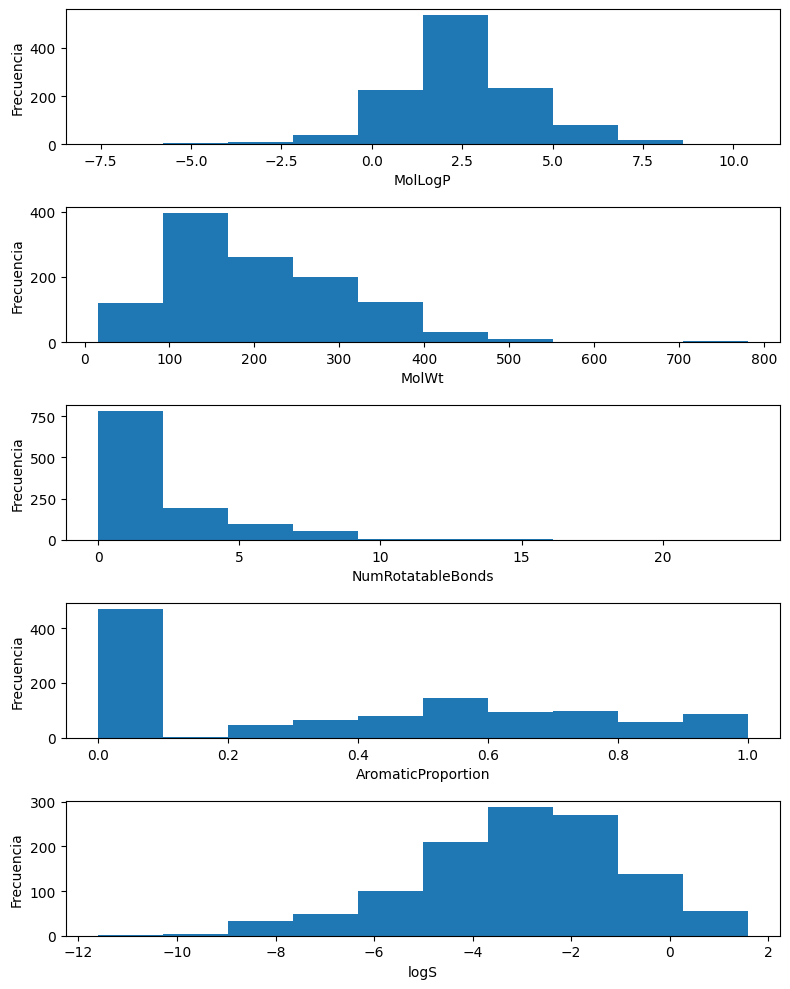

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig = plt.figure(figsize=(8, 10))
ax = fig.subplots(5)

ax[0].hist(df["MolLogP"])
ax[0].set_xlabel('MolLogP')
ax[0].set_ylabel('Frecuencia')

ax[1].hist(df["MolWt"])
ax[1].set_xlabel('MolWt')
ax[1].set_ylabel('Frecuencia')

ax[2].hist(df["NumRotatableBonds"])
ax[2].set_xlabel('NumRotatableBonds')
ax[2].set_ylabel('Frecuencia')

ax[3].hist(df["AromaticProportion"])
ax[3].set_xlabel('AromaticProportion')
ax[3].set_ylabel('Frecuencia')

ax[4].hist(df["logS"])
ax[4].set_xlabel('logS')
ax[4].set_ylabel('Frecuencia')

fig.tight_layout()
plt.show()

Borrado de columna que sera predecida, y creacion de dataframe X para entrenamiento

In [ ]:
X=df.drop(['logS'], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


Creacion de Dataframe Y, con valores que seran predecidos

In [ ]:
Y=df.iloc[:,-1]
Y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


Obtener datos de entrenamiento y prueba, donde del dataset se destinan 80 % para entrenamiento y 20 % para prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Construcción de modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Coeficientes de Y = mx + b
lr.coef_

array([-0.72521491, -0.00663091,  0.00502635, -0.50455953])

In [ ]:
#Este es el valor donde corta el eje Y (en X=0)
lr.intercept_

0.25272417963155114

Haciendo predicciones

In [ ]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [ ]:
y_lr_test_pred

array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

In [ ]:
#Prediciones, se deben ingresar 4 valores, correspondientes a las otras columnas del DataFrame original

vr_pred_logS = lr.predict([[2.91890, 187.375, 1.0, 0.000000]])
print(int(vr_pred_logS))

-3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-46-49273d25fb77>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(vr_pred_logS))


Evaluando performance del modelo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse=mean_squared_error(Y_train, y_lr_train_pred)
lr_train_r2=r2_score(Y_train, y_lr_train_pred)

lr_test_mse=mean_squared_error(Y_test, y_lr_test_pred)
lr_test_r2=r2_score(Y_test, y_lr_test_pred)

In [ ]:
print("El error medio cuadratico de los datos de entrenamiento con respecto a los predecidos es: ", lr_train_mse)
print("El R2 de los datos de entrenamiento con respecto a los predecidos es: ",lr_train_r2)
print("El error medio cuadratico de los datos de prueba con respecto a los predecidos es: ",lr_test_mse)
print("El R2 de los datos de prueba con respecto a los predecidos es: ",lr_test_r2)

El error medio cuadratico de los datos de entrenamiento con respecto a los predecidos es:  1.0139894491573003
El R2 de los datos de entrenamiento con respecto a los predecidos es:  0.7695127746587307
El error medio cuadratico de los datos de prueba con respecto a los predecidos es:  0.9990844407075306
El R2 de los datos de prueba con respecto a los predecidos es:  0.7705650058569232


In [ ]:
lr_results=pd.DataFrame(['Linear regression',
                         lr_train_mse,
                         lr_train_r2,
                         lr_test_mse,
                         lr_test_r2]).transpose()

lr_results.columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


Construccion de modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=42)

Haciendo predicciones a partir de datos de entrenamiento

In [ ]:
y_rf_train_pred=rf.predict(X_train)
y_rf_test_pred=rf.predict(X_test)

Evaluando performance del modelo

In [ ]:
rf_train_mse=mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2=r2_score(Y_train, y_rf_train_pred)

rf_test_mse=mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2=r2_score(Y_test, y_rf_test_pred)

In [ ]:
rf_results=pd.DataFrame(['Random Forest',
                         rf_train_mse,
                         rf_train_r2,
                         rf_test_mse,
                         rf_test_r2]).transpose()

rf_results.columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.050251,0.76127,1.046995,0.759562


In [ ]:
pd.concat([lr_results, rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
0,Random Forest,1.050251,0.76127,1.046995,0.759562


Visualizacion

Text(0.5, 0, 'LogS medidos')

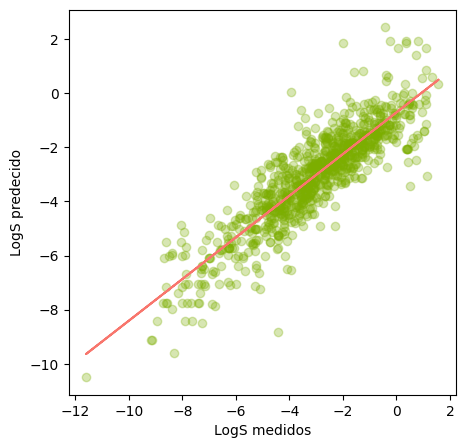

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train,
            y=y_lr_train_pred,
            c="#7CAE00",
            alpha=0.3)

z=np.polyfit(Y_train, y_lr_train_pred, 1)
p=np.poly1d(z)

plt.plot(Y_train, p(Y_train), "#F8766D")
plt.ylabel('LogS predecido')
plt.xlabel('LogS medidos')